In [1]:
import os
import json
import gdown
import pandas as pd
import numpy as np
### Plot
import matplotlib.pyplot as plt
import seaborn as sns
### HTML
from bs4 import BeautifulSoup
import re
### Warnings
import warnings
### Text Preprocessing and Natural Language Processing
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
import nltk
import re
import spacy
from wordcloud import WordCloud
from transformers import BertTokenizer
import random
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import gc
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
import pickle



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
##tmdb dataset with movies before and after 1995
tmdb_df = pd.read_csv('TMDB_movie_dataset_v11.csv') #tmdb dataset we will be working with
tmdb_df.describe()


,id,vote_average,vote_count,revenue,runtime,budget,popularity
count,1.002267e+06,1.002267e+06,1.002267e+06,1.002267e+06,1.002267e+06,1.002267e+06,1.002267e+06
mean,6.625906e+05,2.101624e+00,2.139664e+01,7.421149e+05,5.059751e+01,2.924065e+05,1.349021e+00
std,3.549163e+05,3.110503e+00,3.391106e+02,1.803934e+07,6.229370e+01,5.134357e+06,8.071102e+00
min,2.000000e+00,0.000000e+00,0.000000e+00,-1.200000e+01,-2.800000e+01,0.000000e+00,0.000000e+00
25%,3.705740e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,6.000000e-01
50%,6.643460e+05,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+01,0.000000e+00,6.000000e-01
75%,9.721775e+05,5.000000e+00,1.000000e+00,0.000000e+00,9.000000e+01,0.000000e+00,9.140000e-01
max,1.254286e+06,1.000000e+01,3.449500e+04,3.000000e+09,1.440000e+04,9.000000e+08,2.994357e+03


In [3]:
tmdb_df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili"
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,en,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin"
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish"
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,en,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian"


In [4]:
tmdb_df.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages'],
      dtype='object')

In [5]:
tmdb_df['release_date'] = pd.to_datetime(tmdb_df['release_date'], errors='coerce')
tmdb_df['year'] = tmdb_df['release_date'].dt.year.astype('Int64').astype(str).replace('nan', '')
tmdb_df.head()


,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,year
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili",2010
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,2014
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin",2008
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish",2009
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian",2012


In [6]:
merged_df = pd.read_csv('Merged_df.csv') #tmdb dataset we will be working with

/var/folders/xm/f20bhfv51dl2dr_qlz80lxj40000gn/T/ipykernel_20766/4133269280.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df = pd.read_csv('Merged_df.csv') #tmdb dataset we will be working with


In [7]:
merged_df.describe()

,Unnamed: 0,UserID,MovieID,Rating,Timestamp,Age,Occupation,Movie_Year,id,vote_average,vote_count,revenue,runtime,budget,popularity,year
count,995655.000000,995655.000000,995655.000000,995655.000000,9.956550e+05,995655.000000,995655.000000,995655.000000,9.956550e+05,995655.000000,995655.000000,9.956550e+05,995655.000000,9.956550e+05,995655.000000,995655.000000
mean,497499.293761,3024.246766,1868.315162,3.580880,9.722445e+08,29.751514,8.037000,1986.700259,1.403666e+04,6.945064,3313.428538,1.153455e+08,113.026672,2.414177e+07,24.731529,1986.679850
std,287229.791564,1728.413965,1093.415219,1.117133,1.215508e+07,11.755970,6.531806,14.379815,6.595825e+04,0.908371,4651.414407,1.791631e+08,24.399911,2.905122e+07,19.008418,14.486253
min,0.000000,1.000000,1.000000,1.000000,9.567039e+08,1.000000,0.000000,1919.000000,5.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.600000,1918.000000
25%,248744.500000,1505.000000,1035.000000,3.000000,9.653028e+08,25.000000,2.000000,1982.000000,7.690000e+02,6.459000,532.000000,1.130000e+07,98.000000,2.777000e+06,13.899000,1982.000000
50%,497500.000000,3069.000000,1835.000000,4.000000,9.730193e+08,25.000000,7.000000,1992.000000,6.878000e+03,7.003000,1416.000000,4.635768e+07,110.000000,1.460000e+07,20.140000,1992.000000
75%,746252.500000,4476.000000,2770.000000,4.000000,9.752207e+08,35.000000,14.000000,1997.000000,1.116500e+04,7.520000,3903.000000,1.457933e+08,125.000000,3.400000e+07,29.087000,1997.000000
max,994984.000000,6040.000000,3952.000000,5.000000,1.046455e+09,56.000000,20.000000,2000.000000,1.214190e+06,10.000000,27238.000000,2.264162e+09,298.000000,2.000000e+08,300.738000,2000.000000


In [8]:
merged_df.shape

(995655, 38)

# Preprocessing

If there are na values in any row, the movie does not exist in either TMDB dataset or MovieLens dataset  



In [9]:
## start of work
# only movies that exist in both datasets
pre_2000 = merged_df.dropna()
pre_2000.columns


Index(['Unnamed: 0', 'UserID', 'MovieID', 'Rating', 'Timestamp', 'Title',
       'Genres', 'Gender', 'Age', 'Occupation', 'ZipCode', 'Movie_Title',
       'Movie_Year', 'id', 'title', 'vote_average', 'vote_count', 'status',
       'release_date', 'revenue', 'runtime', 'adult', 'backdrop_path',
       'budget', 'homepage', 'imdb_id', 'original_language', 'original_title',
       'overview', 'popularity', 'poster_path', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages',
       'year', 'title_year'],
      dtype='object')

In [10]:
pre_2000.shape

(223451, 38)

In [11]:
#mostly english --> not significant
pre_2000['original_language'].value_counts()

original_language
en    219668
fr       860
it       822
es       815
ja       591
de       480
da       154
fa        61
Name: count, dtype: int64

In [12]:
#Mostly usa and uk--> can drop
pre_2000['production_countries'].value_counts()

production_countries
United States of America                                       170371
United Kingdom, United States of America                        22527
United Kingdom                                                   6661
France, United States of America                                 2649
United States of America, United Kingdom                         2379
Canada, United States of America                                 1975
United States of America, Hong Kong, United Kingdom              1800
United States of America, Canada                                 1706
Mexico, United States of America                                 1315
Ireland, Japan, United Kingdom                                   1229
Australia, United States of America                              1067
France, United Kingdom, United States of America                  980
United States of America, Italy, Spain, Germany                   822
Mexico                                                            777

In [13]:
pre_2000['production_companies'].value_counts()

production_companies
Universal Pictures, Amblin Entertainment                                                             10331
Paramount                                                                                             9874
Lucasfilm Ltd.                                                                                        8524
Walt Disney Productions                                                                               7039
Paramount, Lucasfilm Ltd.                                                                             5278
                                                                                                     ...  
Next Wave Films, Syncopy                                                                                29
Columbia Pictures, Parkway Productions                                                                  24
A. Ninety-Three Productions                                                                             23
Dimension Films,

## Removing columns that are not helpful
home page, imdb_idp, zipcode, backdrop_path etc


Will use gender and ratings to test if old movies can be used to recommend newer movies --> other columns from MovieLens are not easy to predict, but gender is binary and will be easier


In [14]:
#preprocess
# dropped age, occupation, zipcode from movielens
to_keep = ['UserID', 'Rating', 'Gender',
       'id', 'title', 'vote_average',
       'vote_count', 'revenue', 'runtime', 'adult','budget',
       'overview', 'popularity', 'tagline',
       'genres', 'production_companies',
       'spoken_languages', 'year']

pre_2000_analysis = pre_2000[to_keep].rename(columns={'UserID': 'userId',
                                                      'Rating': 'rating',
                                                      'Gender':'gender'})


## EDA on gender column
There are about 3.5x more M than F reviews
we need to apply multiplier to F ratings


<Axes: xlabel='gender'>

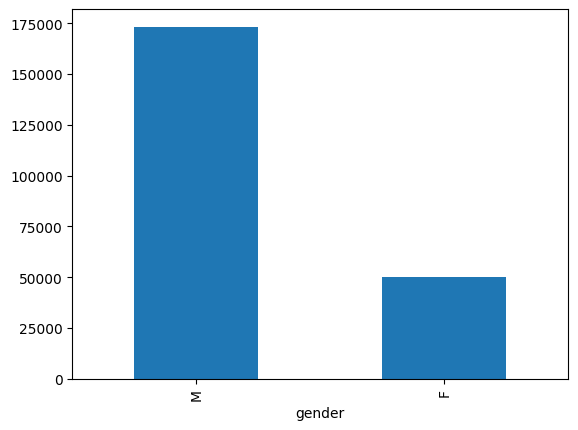

In [15]:
gender_count = pre_2000_analysis['gender'].value_counts()
gender_count.plot(kind='bar')

Applying multiplier

In [16]:
pre_2000_analysis['gender'] = pre_2000_analysis['gender'].apply(lambda x: -1 if x == 'M' else  gender_count['M']/gender_count['F'])
pre_2000_analysis['gender_rating'] = pre_2000_analysis['gender'] * pre_2000_analysis['rating']

## Group by movieID to get rows of movies

There are 216 movies

In [17]:
#aggregate
# each row is 1 movie
agg_analysis = pre_2000_analysis.groupby('id').agg({k: 'mean' if v in ('int64', 'float64') else 'first'
                          for k,v in pre_2000_analysis.dtypes[1:].items()})
agg_analysis.head()

,rating,gender,id,title,vote_average,vote_count,revenue,runtime,adult,budget,overview,popularity,tagline,genres,production_companies,spoken_languages,year,gender_rating
id,,,,,,,,,,,,,,,,,,
5.0,3.337580,-0.234764,5.0,Four Rooms,5.784,2436.0,4257354.0,98.0,False,4000000.0,It's Ted the Bellhop's first night on the job....,15.295,Twelve outrageous guests. Four scandalous requ...,Comedy,"Miramax, A Band Apart",English,1995.0,-0.871818
11.0,4.453694,-0.037459,11.0,Star Wars,8.204,19155.0,775398007.0,121.0,False,11000000.0,Princess Leia is captured and held hostage by ...,88.559,"A long time ago in a galaxy far, far away...","Adventure, Action, Science Fiction","Lucasfilm Ltd., 20th Century Fox",English,1977.0,-0.311940
13.0,4.087967,0.306113,13.0,Forrest Gump,8.477,25409.0,677387716.0,142.0,False,55000000.0,A man with a low IQ has accomplished great thi...,92.693,The world will never be the same once you've s...,"Comedy, Drama, Romance","Paramount, The Steve Tisch Company, Wendy Fine...",English,1994.0,1.195301
28.0,4.243197,-0.322706,28.0,Apocalypse Now,8.282,7485.0,150000000.0,147.0,False,31500000.0,"At the height of the Vietnam war, Captain Benj...",37.715,This is the end...,"Drama, War","United Artists, American Zoetrope","Khmer, English, French, Vietnamese",1979.0,-1.564291
62.0,4.061414,-0.102840,62.0,2001: A Space Odyssey,8.076,10575.0,71923560.0,149.0,False,12000000.0,Humanity finds a mysterious object buried bene...,48.932,The Ultimate Trip.,"Science Fiction, Mystery, Adventure","Stanley Kubrick Productions, Metro-Goldwyn-Mayer","English, Russian",1968.0,-0.635190


## EDA on numerical columns

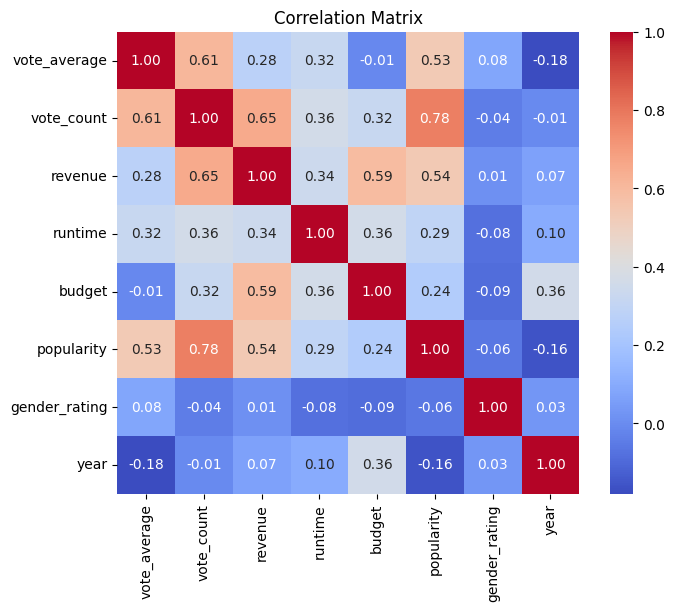

In [18]:
#correlation matrix for numerical cols
to_drop = ['rating', 'gender', 'id']
agg_analysis = agg_analysis.drop(columns = to_drop)

numerical_columns = ['vote_average', 'vote_count', 'revenue', 'runtime', 'budget',
                     'popularity', 'gender_rating', 'year']
num_analysis = agg_analysis[numerical_columns]
num_corr = num_analysis.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(num_corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()

In [19]:
agg_analysis.shape

(306, 15)

## Removing movies which have a vote count lower than threshold
Because most movies have very few votes and to reduce RAM usage of cosine similarity matrix

In [20]:
## applying the pref gender column to tmdb dataset
## first must clean tmdb
# 1 million rows of movies
print(f'{tmdb_df.shape[0]} rows of movies')
print(f"{tmdb_df['vote_count'].quantile(0.9)} votes in the 90th percentile")
# threshold --> how many votes a movie must have to be included in our rec sys
# can be changed
threshold = 200
to_keep = ['id', 'title', 'vote_average',
       'vote_count', 'revenue', 'runtime', 'adult','budget',
       'overview', 'popularity', 'tagline',
       'genres', 'production_companies',
       'spoken_languages', 'year']
tmdb_above_thresh = tmdb_df[tmdb_df['vote_count'] >= threshold]
tmdb_below_thresh = tmdb_df[tmdb_df['vote_count'] < threshold]
tmdb_above_thresh = tmdb_above_thresh[to_keep]
tmdb_above_thresh.shape

1002267 rows of movies
6.0 votes in the 90th percentile


(11786, 15)

## Creating a word soup
Adding all the words columns together for both tmdb dataset and movielens dataset (agg_analysis)

In [21]:
# text preprocessing
def remove_punctuation(text):

    punctuation_pattern = r'[^\w\s]'

    # Remove punctuation using regex
    text_without_punctuation = re.sub(punctuation_pattern, '', text)

    return text_without_punctuation


In [22]:
# Download WordNet data (run once if you haven't downloaded it before)
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text, max_length = 512, return_string = True):
  # Tokenize the text into words
  words = word_tokenize(text)
  # shuffle text and get the max leg
  random.shuffle(words)
  words = words[:max_length]
  # Lemmatize each word using its part of speech (POS) tag
  lemmatized_words = []
  for word, tag in nltk.pos_tag(words):
      # Convert POS tag to WordNet POS tag
      wn_tag = tag[0].lower()
      wn_tag = wn_tag if wn_tag in ['a', 'r', 'n', 'v'] else None

      if wn_tag:
          lemmatized_word = lemmatizer.lemmatize(word, pos=wn_tag)
      else:
          lemmatized_word = lemmatizer.lemmatize(word)

      lemmatized_words.append(lemmatized_word)

  # list of preprocessed and shuffled string
  if return_string:
    lemmatized_text = ' '.join(lemmatized_words)
    return lemmatized_text
  return lemmatized_words


[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify
[nltk_data]     failed: unable to get local issuer certificate
[nltk_data]     (_ssl.c:1000)>
[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>
[nltk_data] Error loading wordnet: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>
[nltk_data] Error loading omw-1.4: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>


In [23]:
## trying bert
def tokenize_text(text):
  tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
  return tokenizer.encode(
        text,
        max_length=512,           
        padding='max_length',     
        truncation=True,
        is_split_into_words = True, 
        return_tensors='np'       
    )


In [24]:
## combine preprocessing steps
def preprocess(text):
  lemma_text_list = lemmatize_text(text)
  return tokenize_text(lemma_text_list)

In [25]:
#word soup + tfidf
# remove commas from genres
agg_analysis['genres'] =agg_analysis['genres'].apply(lambda x: x.replace(',',''))

word_cols = ['overview', 'tagline',
       'genres', 'production_companies',
       'spoken_languages']

agg_analysis['word_soup'] = agg_analysis[word_cols].sum(axis = 1)


tmdb_above_thresh['genres'] = tmdb_above_thresh['genres'].apply(lambda x: str(x).replace(',',''))
tmdb_above_thresh[word_cols] = tmdb_above_thresh[word_cols].astype(str)

tmdb_above_thresh['word_soup'] = tmdb_above_thresh[word_cols].sum(axis = 1)
tmdb_above_thresh['word_soup'].head()
# remove word columns since we are done with it
tmdb_above_thresh = tmdb_above_thresh.drop(word_cols, axis = 1)


## Applying TfIdf Transformation
We have 2 word soups --> 1 from a df with 216 rows, another from a df with 9k rows   
Should fit the TfIdf on the one with a larger vocabulary i.e. the one with more rows  

In [26]:
tfidf = TfidfVectorizer(stop_words= 'english', max_features=10000,dtype = np.float32)
# tmdb_above_100 has 180000 rows --> bigger vocab
# agg_analysis (movielens and tmdb combined) has 216 rows --> smaller vocab
tfidf.fit(tmdb_above_thresh['word_soup'])
ml_tfidf = tfidf.transform(agg_analysis['word_soup'])
tmdb_tfidf = tfidf.transform(tmdb_above_thresh['word_soup'])

## Applying encoding and text preprocessing

In [28]:
#using pickle

save_encoding_path = 'bert_encoding.pickle'
if os.path.exists(save_encoding_path):
  data = None
  with open(save_encoding_path, 'rb') as f:
    data = pickle.load(f)

  ml_encoding = data['ml']
  tmdb_encoding = data['tmdb']
else:
  ml_encoding = agg_analysis['word_soup'].apply(lambda x: preprocess(x))
  tmdb_encoding = tmdb_above_thresh['word_soup'].apply(lambda x: preprocess(x))


  encodings = {'ml': ml_encoding, 'tmdb': ml_encoding}
  with open(save_encoding_path, 'wb') as file:
    pickle.dump(encodings,file)

ml_encoding.head()

id
5.0     [[101, 4237, 13159, 13602, 3105, 2166, 1012, 4...
11.0    [[101, 2185, 3400, 2058, 2362, 4615, 1012, 101...
13.0    [[101, 2010, 2010, 2156, 2750, 3087, 3278, 252...
28.0    [[101, 1010, 2162, 2022, 4839, 3260, 4327, 326...
62.0    [[101, 2087, 3565, 2000, 1996, 1998, 11085, 19...
Name: word_soup, dtype: object

In [29]:
ml_encoding = ml_encoding.apply(lambda x: x[0]).apply(pd.Series)
tmdb_encoding = tmdb_encoding.apply(lambda x: x[0]).apply(pd.Series)
ml_encoding.head()

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
id,,,,,,,,,,,,,,,,,,,,,
5.0,101,4237,13159,13602,3105,2166,1012,4038,14503,8067,...,0,0,0,0,0,0,0,0,0,0
11.0,101,2185,3400,2058,2362,4615,1012,1012,1012,3521,...,0,0,0,0,0,0,0,0,0,0
13.0,101,2010,2010,2156,2750,3087,3278,2521,2002,2071,...,0,0,0,0,0,0,0,0,0,0
28.0,101,1010,2162,2022,4839,3260,4327,3260,1005,1005,...,0,0,0,0,0,0,0,0,0,0
62.0,101,2087,3565,2000,1996,1998,11085,1997,2009,6547,...,0,0,0,0,0,0,0,0,0,0


## Creating dataset for gender classification using movielens aggregated dataset

In [30]:
# print(soup_tfidf.shape,type(soup_tfidf))
# data for our classifier


ml_tfidf = ml_tfidf.toarray().astype('float16')
tmdb_tfidf = tmdb_tfidf.toarray().astype('float16')

ml_encoding = ml_encoding.astype('float16')
tmdb_encoding = tmdb_encoding.astype('float16')
# 1 for F, 0 for M
# label for our classifier
gender_pref = agg_analysis['gender_rating'].apply(lambda x: 1 if x > 0 else 0)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(ml_encoding, gender_pref, test_size=0.2, random_state=42)

## Training classifiers with BERT encodings
Use multiple classifiers to compare results

In [32]:
# trying different models
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train)

svc_clf = SVC()
svc_clf.fit(X_train, y_train)

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

nb_clf = MultinomialNB()
nb_clf.fit(X_train, y_train)

# Make predictions on the testing set
svc_pred = svc_clf.predict(X_test)
lr_pred = lr_clf.predict(X_test)
nb_pred = nb_clf.predict(X_test)
xgb_pred = xgb_clf.predict(X_test)

svc_accuracy = accuracy_score(y_test, svc_pred)
lr_accuracy = accuracy_score(y_test, lr_pred)
nb_accuracy = accuracy_score(y_test, nb_pred)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

print("Support Vector Classifier Accuracy:", svc_accuracy)
print("Logistic Regression Accuracy:", lr_accuracy)
print("Multinomial Naive Bayes Accuracy:", nb_accuracy)
print("XGB Accuracy:", xgb_accuracy)

Support Vector Classifier Accuracy: 0.46774193548387094
Logistic Regression Accuracy: 0.5161290322580645
Multinomial Naive Bayes Accuracy: 0.45161290322580644
XGB Accuracy: 0.3870967741935484


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Training classifiers with tfidf encodings
Use multiple classifiers to compare results

In [33]:
X_train, X_test, y_train, y_test = train_test_split(ml_tfidf, gender_pref, test_size=0.2, random_state=42)
xgb_tfidf_clf = xgb.XGBClassifier()
xgb_tfidf_clf.fit(X_train, y_train)

svc_tfidf_clf = SVC()
svc_tfidf_clf.fit(X_train, y_train)

lr_tfidf_clf = LogisticRegression()
lr_tfidf_clf.fit(X_train, y_train)

nb_tfidf_clf = MultinomialNB()
nb_tfidf_clf.fit(X_train, y_train)

# Make predictions on the testing set
svc_tfidf_pred = svc_tfidf_clf.predict(X_test)
lr_tfidf_pred = lr_tfidf_clf.predict(X_test)
nb_tfidf_pred = nb_tfidf_clf.predict(X_test)
xgb_tfidf_pred = xgb_tfidf_clf.predict(X_test)

svc_tfidf_accuracy = accuracy_score(y_test, svc_tfidf_pred)
lr_tfidf_accuracy = accuracy_score(y_test, lr_tfidf_pred)
nb_tfidf_accuracy = accuracy_score(y_test, nb_tfidf_pred)
xgb_tfidf_accuracy = accuracy_score(y_test, xgb_tfidf_pred)

print("Support Vector Classifier Accuracy:", svc_tfidf_accuracy)
print("Logistic Regression Accuracy:", lr_tfidf_accuracy)
print("Multinomial Naive Bayes Accuracy:", nb_tfidf_accuracy)
print("XGB Accuracy:", xgb_tfidf_accuracy)

Support Vector Classifier Accuracy: 0.7580645161290323
Logistic Regression Accuracy: 0.7580645161290323
Multinomial Naive Bayes Accuracy: 0.7419354838709677
XGB Accuracy: 0.8064516129032258


## Using classifier to predict the gender preference of movies in TMDB


In [34]:
# 1 for F, 0 for M
tmdb_gender_pref = xgb_tfidf_clf.predict(tmdb_tfidf)
tmdb_gender_pref.shape

(11786,)

## Converting gender pref and adult into numerical features


In [35]:
numerical_columns = ['vote_average', 'vote_count', 'revenue', 'runtime', 'budget',
                     'popularity', 'gender_pref','adult','year']
# converting back to -1 for male, 1 for female
tmdb_above_thresh['gender_pref'] = tmdb_gender_pref
tmdb_above_thresh['gender_pref'] = tmdb_above_thresh['gender_pref'].apply(lambda x : -1 if x == 0 else 1)
# -1 if adult, 1 if not
tmdb_above_thresh['adult'] = tmdb_above_thresh['adult'].apply(lambda x : -1 if x  else 1)
tmdb_above_thresh['year'] = tmdb_above_thresh['year'].astype(int)
# without scaling first
tmdb_num = tmdb_above_thresh[numerical_columns]

In [36]:
#free up ram
del pre_2000
del pre_2000_analysis
del tmdb_df
del merged_df
del xgb_clf
del svc_clf
del nb_clf
del lr_clf
del xgb_tfidf_clf
del svc_tfidf_clf
del nb_tfidf_clf
del lr_tfidf_clf
del X_test
del X_train
del agg_analysis
del ml_tfidf
del ml_encoding
del tmdb_encoding
del gender_pref
gc.collect()

9101

threshold -when is recommendations too unsimilar
strict_k - when you want to enforce threshold

## Recommendations
1. Get index of movie with 'title' == title
2. Create a reverse score array --> indices with highest similarity are sorted first
3. get all indices except the first one --> the 0th index is always the movie that is being searched, since it is most similar with itself


In [37]:

def recommend_movies(data, movie, similarity_matrix, top_k=10, threshold = 0.5, strict_k = True):
  # get index of movie with <title> in dataframe
  try:
    index = data.index[data['title'] == movie][0]
    try:
      score_arr = similarity_matrix[index].toarray()
    except:
      score_arr = similarity_matrix[index]
    if not strict_k:
      score_arr =   np.fromiter((x for x in score_arr if x > threshold), dtype=score_arr.dtype)
    reversed_score_arr = np.argsort(score_arr)[::-1]

    top_k_movies = reversed_score_arr[1:top_k + 1]
    return data.iloc[top_k_movies]

  except Exception as e:
        # If any other exception occurred, print it and return an empty list
        print(f"An error occurred in recommender: {e}")
        return pd.DataFrame()

def recommend_movie_index(index, similarity_matrix, top_k=10, threshold = 0.5):
  try:
    score_arr = similarity_matrix[index].toarray()
  except:
    score_arr = similarity_matrix[index]

  score_arr =   np.fromiter((x for x in score_arr if x > threshold), dtype=score_arr.dtype)
  top_k = min(top_k,len(score_arr))
  reversed_score_arr = np.argsort(score_arr)[::-1]
  return reversed_score_arr[1:top_k + 1]
# will add increased weightage to year later
def recommend_movies_before_date(data, movie, similarity_matrix, top_k=10, threshold = 0.5, strict_k = True, date = None):
  # get index of movie with <title> in dataframe
  index = data.index[data['title'] == movie][0]
  try:
    score_arr = similarity_matrix[index].toarray()
  except:
    score_arr = similarity_matrix[index]
  if not strict_k:
    score_arr =   np.fromiter((x for x in score_arr if x > threshold), dtype=score_arr.dtype)
  reversed_score_arr = np.argsort(score_arr)[::-1]

  top_k_movies = reversed_score_arr[1:top_k + 1]
  if date:
    recs = data.iloc[top_k_movies]
    return recs[recs['year'].astype(int) <= date]
  else:
    return data.iloc[top_k_movies]

In [38]:
# recommend_movies(tmdb_above_thresh, "Inception", cos_matrix_initial)

In [39]:
# recommend_movies_before_date(tmdb_above_thresh, "Inception", cos_matrix_initial, date = 2010)

## Defining relevance
We define relevance as movies that have ratings within a standard deviations of the searched movie


In [40]:
# gets all relevant movie indexes for 1 movie --> change rating to some other combination of variable

def get_relevant(df,ratings,index, a = 0.5):

    movie_score = df.iloc[index].sum()
    ratings_sd = a * ratings.std()
    relevant = ratings.between(movie_score - ratings_sd, movie_score + ratings_sd).index
    return relevant


## Evaluation
We define model precision by the sum of precisions for recommending each movie --> i.e. get recommendations for each movie in tmdb_above thresh, calc precision for that recommendation, and sum each precision calculated

Same is done for recall

In [41]:
# gets precision for 1 movie

def precision_for_movie(df,ratings,index,similarity_matrix,relevance_range):

    relevant_items = get_relevant(df,ratings,index,relevance_range)

    recommended_items = recommend_movie_index(index, similarity_matrix,
                                              top_k = len(relevant_items),
                                              threshold= 0.85)
    # Calculate the intersection of recommended_items and relevant_items
    true_positive = len(set(recommended_items).intersection(set(relevant_items)))

    # Calculate the total number of recommended items
    total_recommended_items = len(recommended_items)

    # Calculate precision
    # This check is done in case the number of recommended items == 0
    # --> to prevent division by 0 error
    precision_value = true_positive / total_recommended_items if total_recommended_items > 0 else 0
    return precision_value

# get model precision
def model_precision(df,ratings,similarity_matrix,relevance_range):
    total = 0
    df_dict = df.to_dict('records')
    for row in range(len(df_dict)):
        total += precision_for_movie(df,ratings,row, similarity_matrix,relevance_range)
    return total/len(df)

# get recall for 1 movie
def recall_for_movie(df,ratings,index,similarity_matrix,relevance_range):
    relevant_items = get_relevant(df,ratings,index, relevance_range)
    recommended_items = recommend_movie_index(index, similarity_matrix,
                                              top_k = len(relevant_items),
                                              threshold= 0.85)
    # Calculate the intersection of recommended_items and relevant_items
    true_positive = len(set(recommended_items).intersection(set(relevant_items)))

    # Calculate the total number of relevant items
    total_relevant_items = len(relevant_items)

    # Calculate recall
    recall_value = true_positive / total_relevant_items if total_relevant_items > 0 else 0
    return recall_value
# get model recall
def model_recall(df,ratings,similarity_matrix,relevance_range):
    total = 0
    df_dict = df.to_dict('records')
    for row in range(len(df_dict)):
        total += recall_for_movie(df,ratings,row,similarity_matrix,relevance_range)
    return total/len(df)


def model_f1_score(precision,recall):
    return (2*precision*recall)/(precision+recall)


In [42]:
# cos matrix with scaling and preprocessing here + add encoding
# scaling num columns
to_scale_1 = [ 'revenue', 'runtime', 'budget',
             'gender_pref','adult']
            #  female pref non adult movie -> 9 --> because non adult is +ve and female pref is +ve
            #  male rpef adult movie --> 6
            # sum(numerical columns) * gender pref --> female pref movies --> rating +ve and -ve for men

to_scale_2 = ['vote_average','vote_count','popularity']
# we want recommend more recent movies, give more weight to year
to_scale_3 = ['year']
tmdb_above_thresh_copy = tmdb_above_thresh.copy(deep=True)
scaler1 = MinMaxScaler(feature_range = (-1,1))
# vote_count and popularity more correlated with higher vote average
scaler2 = MinMaxScaler(feature_range = (-2,2))

scaler3 = MinMaxScaler(feature_range = (-3,3))

tmdb_above_thresh['gender_pref'] = tmdb_above_thresh['gender_pref'].apply(lambda x : -1 if x == 0 else 1)
tmdb_above_thresh_copy[to_scale_1] = scaler1.fit_transform(
    tmdb_above_thresh_copy[to_scale_1])
tmdb_above_thresh_copy[to_scale_2] = scaler2.fit_transform(
    tmdb_above_thresh_copy[to_scale_2])
tmdb_above_thresh_copy[to_scale_3] = scaler2.fit_transform(
    tmdb_above_thresh_copy[to_scale_3])
# add encoding back

tmdb_scaled = pd.concat([tmdb_above_thresh_copy[numerical_columns], pd.DataFrame(tmdb_tfidf)], axis=1)

In [43]:
tmdb_rating_scaled = tmdb_scaled[numerical_columns].sum(axis = 1)

In [44]:
# del cos_matrix_initial
del tmdb_tfidf
del tmdb_above_thresh_copy
gc.collect()

0

In [45]:
def batch_cosine_similarity(m1, m2, batch_size=100):
    assert m1.shape[1] == m2.shape[1]
    ret = np.ndarray((m1.shape[0], m2.shape[0]), dtype=np.float32)
    for row_i in range(0, int(m1.shape[0] / batch_size) + 1):
        start = row_i * batch_size
        end = min([(row_i + 1) * batch_size, m1.shape[0]])
        if end <= start:
            break
        rows = m1[start: end]
        sim = cosine_similarity(rows, m2) # rows is O(1) size
        ret[start: end] = sim
    return ret

In [46]:
cos_matrix_final = batch_cosine_similarity(tmdb_scaled.values,tmdb_scaled.values)
# remove the tfidf columns because they take too much ram
tmdb_scaled  = tmdb_scaled.iloc[:, :9]

In [47]:
precision_final = model_precision(tmdb_scaled,tmdb_rating_scaled,cos_matrix_final, 0.9)
recall_final = model_recall(tmdb_scaled,tmdb_rating_scaled,cos_matrix_final, 0.9)
f1_final = model_f1_score(precision_final, recall_final)

In [48]:
print(f'Model Precision: {precision_final}')
print(f'Model Recall: {recall_final}')
print(f'Model F1: {f1_final}')

Model Precision: 1.0
Model Recall: 0.4290272228173163
Model F1: 0.6004465358910273


## Final Recommendation

In [49]:
def add_random_movie(random_movie_df, recommended_movies_df,n_random = 1):
  random.seed(42)
  cols = ['id', 'title', 'vote_average', 'vote_count', 'revenue', 'runtime',
       'adult', 'budget', 'popularity', 'year']
  while n_random:
    random_index = random.randint(0, random_movie_df.shape[0])
    random_movie_df = random_movie_df.reset_index()
    recommended_movies_df = pd.concat([recommended_movies_df[cols],
                                       pd.DataFrame(random_movie_df.iloc[random_index][cols]).T]
                                      ,ignore_index=True)

    n_random -= 1
  return recommended_movies_df

def process_excel_and_recommend_movies(excel_file_path):
    df = pd.read_csv(excel_file_path)

    recommendations = []

    for index, row in df.iterrows():
        user_id = row['UserID']
        movie_title = re.sub(r' \(\d{4}\)', '', row['Title'])
        print(movie_title)

        try:
            # Get the top 5 recommended movies for the title
            recommended_movies_df = add_random_movie(tmdb_below_thresh, recommend_movies(tmdb_above_thresh, movie_title, cos_matrix_final, 4))
            # If recommend_movies function returns an empty DataFrame, handle the case
            if recommended_movies_df.empty:
                recommended_titles = ["No recommended movies found"] * 5
            else:
                recommended_titles = recommended_movies_df['title'].tolist()

        except Exception as e:
            print(f"An error occurred for movie '{movie_title}': {e}")
            recommended_titles = ["No recommended movies found"] * 5

        recommendations.append([user_id, row['Title']] + recommended_titles)

    recommendations_df = pd.DataFrame(recommendations, columns=['UserID', 'Title'] + [f'Recommended Movie {i+1}' for i in range(5)])

    recommendations_df.to_csv('recommended_movies.csv', index=False)

process_excel_and_recommend_movies('top1movie-1.csv')


Saving Private Ryan
Star Wars: Episode V - The Empire Strikes Back
An error occurred in recommender: index 0 is out of bounds for axis 0 with size 0
An error occurred for movie 'Star Wars: Episode V - The Empire Strikes Back': "None of [Index(['id', 'title', 'vote_average', 'vote_count', 'revenue', 'runtime',\n       'adult', 'budget', 'popularity', 'year'],\n      dtype='object')] are in the [columns]"
Star Wars: Episode IV - A New Hope
An error occurred in recommender: index 0 is out of bounds for axis 0 with size 0
An error occurred for movie 'Star Wars: Episode IV - A New Hope': "None of [Index(['id', 'title', 'vote_average', 'vote_count', 'revenue', 'runtime',\n       'adult', 'budget', 'popularity', 'year'],\n      dtype='object')] are in the [columns]"
Saving Private Ryan
American Beauty
The  Patriot
An error occurred in recommender: index 0 is out of bounds for axis 0 with size 0
An error occurred for movie 'The  Patriot': "None of [Index(['id', 'title', 'vote_average', 'vote_c

# End of work